# Notes
Conservation de la masse
On retiendra sans doute plutôt terme x vs le terme de loss supplémentaire Probable meilleur : 12 scene consecutive avec terme multiplicatif 

 - conservation par facteur multiplicatif avec fonction alpha(densité )
 - experience avec 12_2cnv_uv avec facteur multiplicatif. Comparaison à Unet (nouvel exp.).

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sf
from IPython import display
import math as mt
import matplotlib.animation as animation
import xarray as xr
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

37.820145 37.820145


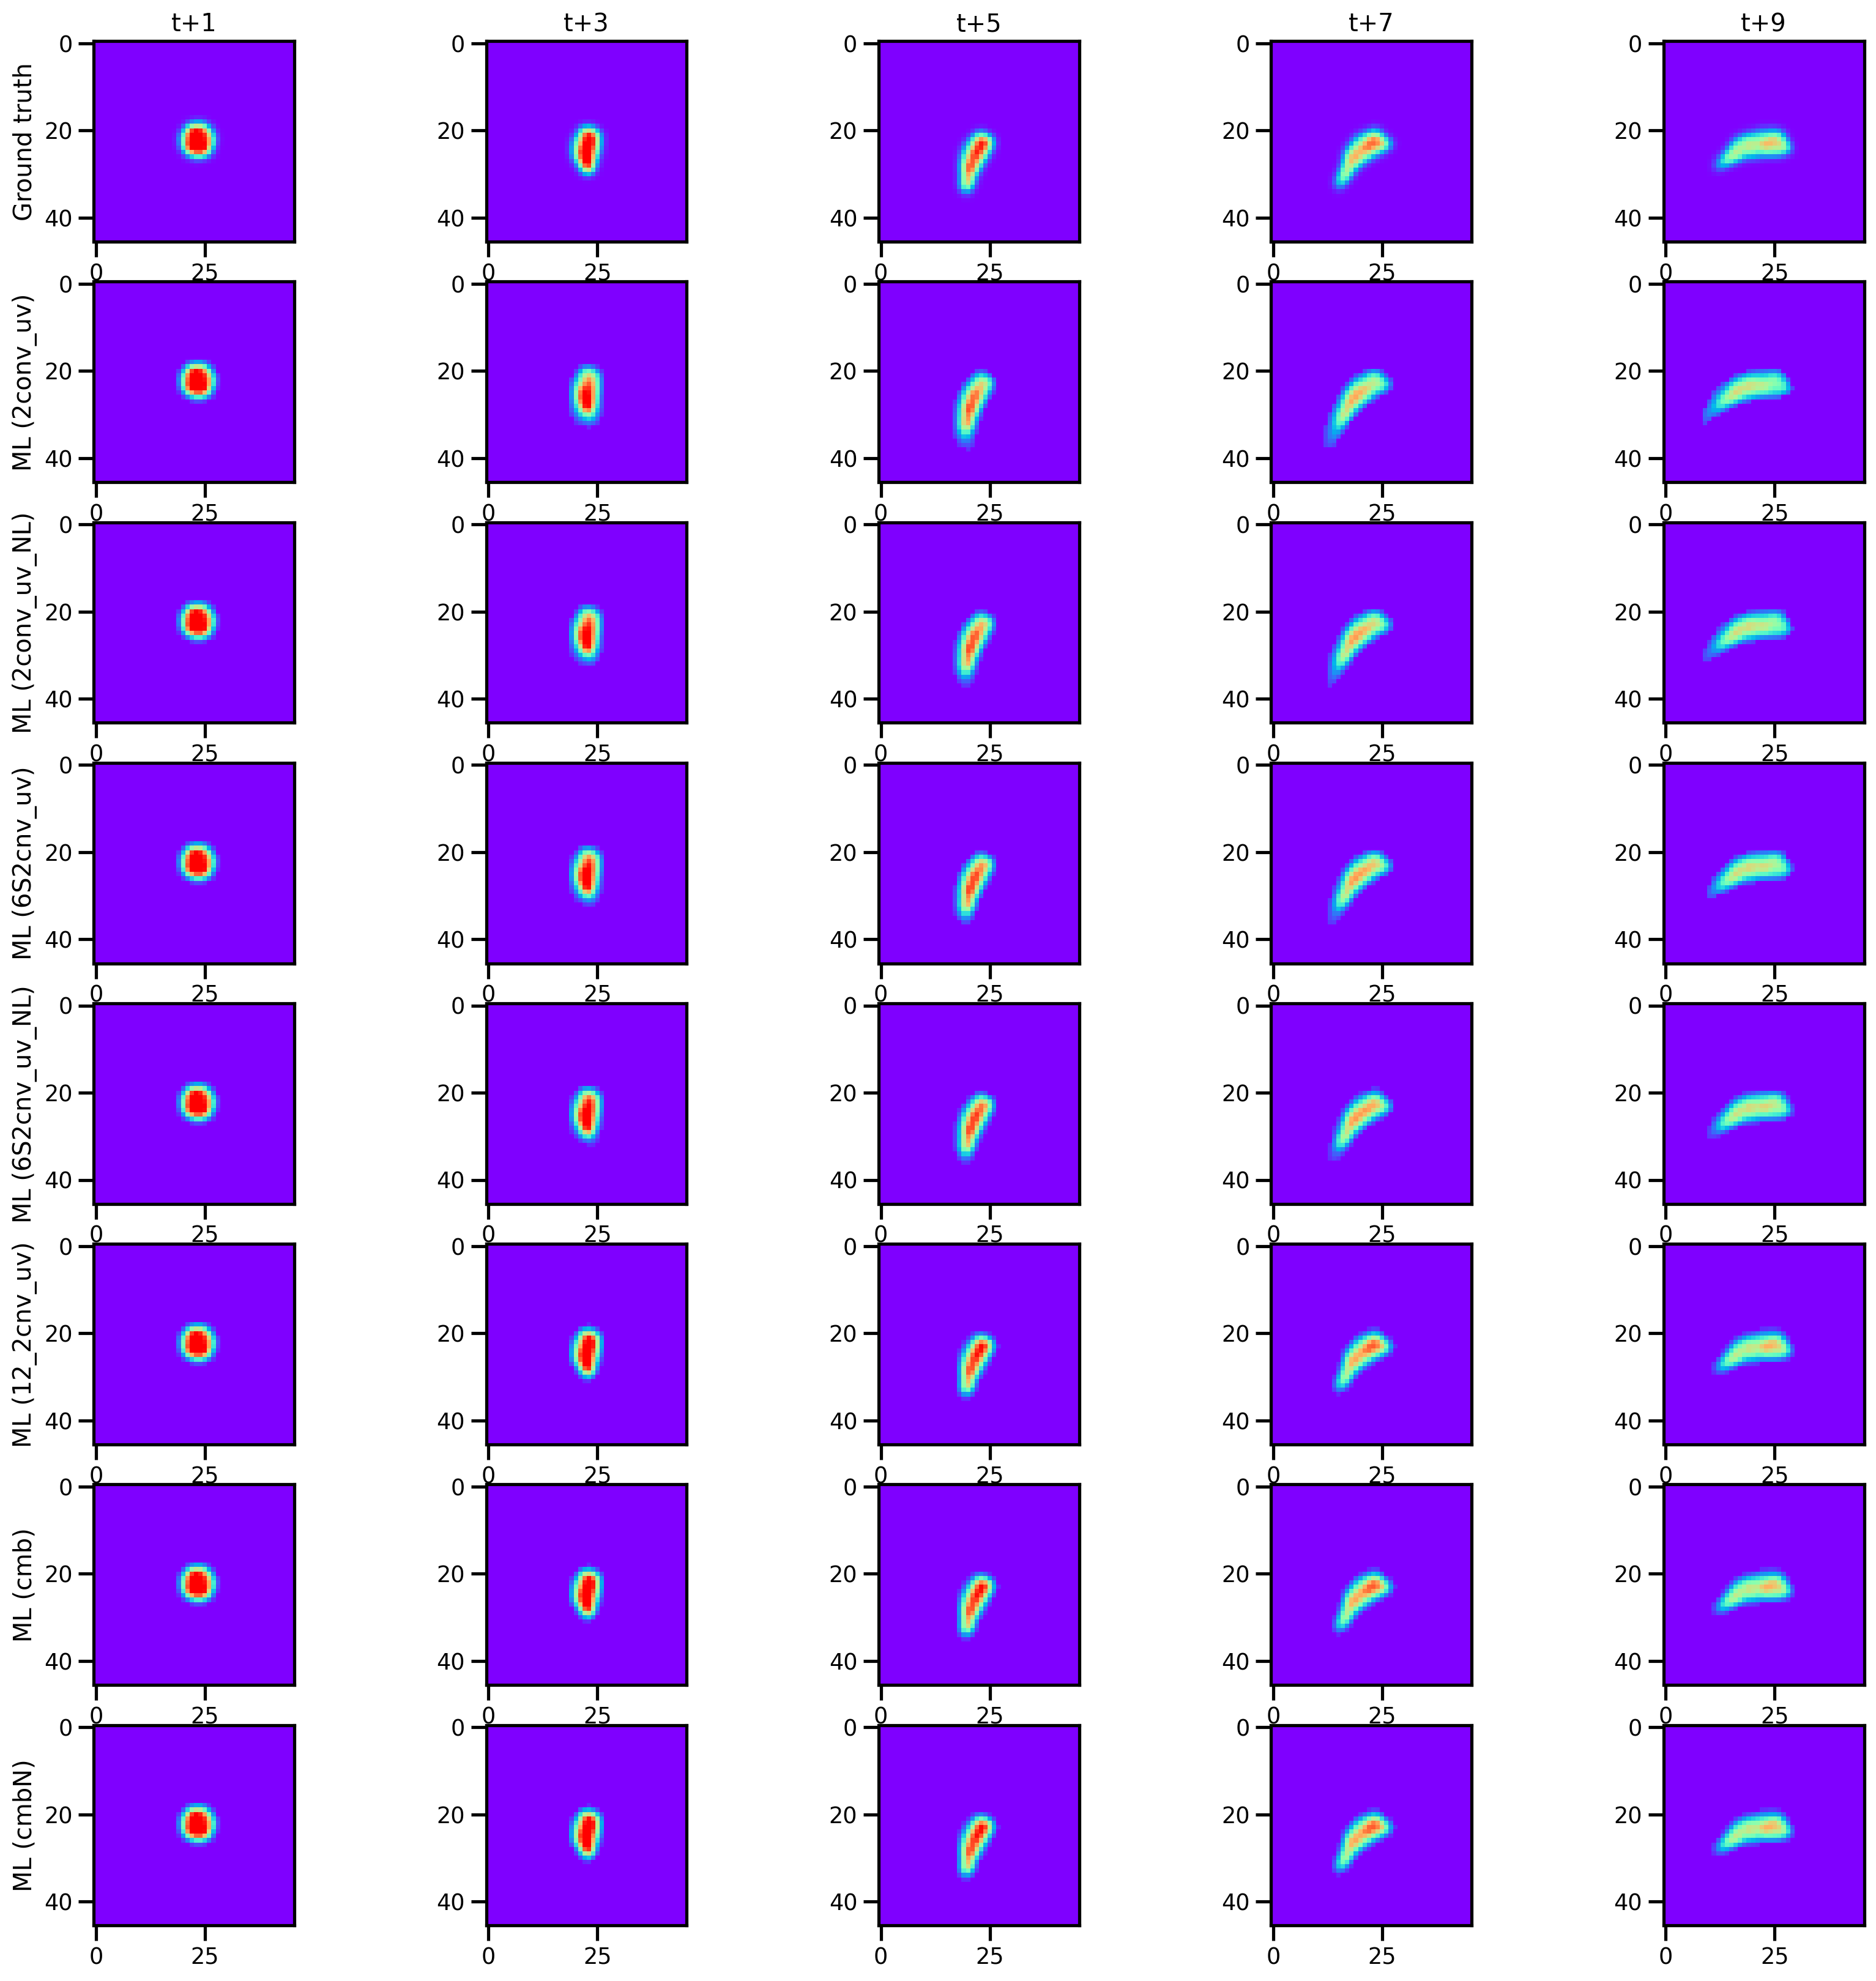

In [47]:
import matplotlib.cm as cm             
import myfuncts 

gt, ml, ml12, ml2cN, ml62c, ml62cN, cmb, cmbN=myfuncts.load_snapsh()

fig, axs = plt.subplots(ncols=5, nrows=8, figsize=(20,20))
axs.shape

vm=0.85
k=23
for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    #print(ind)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ml[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ml2cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[3,j].imshow(ml62c[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[4,j].imshow(ml62cN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[5,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[6,j].imshow(cmb[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[7,j].imshow(cmbN[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (2conv_uv)')
axs[2,0].set_ylabel('ML (2conv_uv_NL)')
axs[3,0].set_ylabel('ML (6S2cnv_uv)')
axs[4,0].set_ylabel('ML (6S2cnv_uv_NL)')
axs[5,0].set_ylabel('ML (12_2cnv_uv)')
axs[6,0].set_ylabel('ML (cmb)')
axs[7,0].set_ylabel('ML (cmbN)')
plt.show()


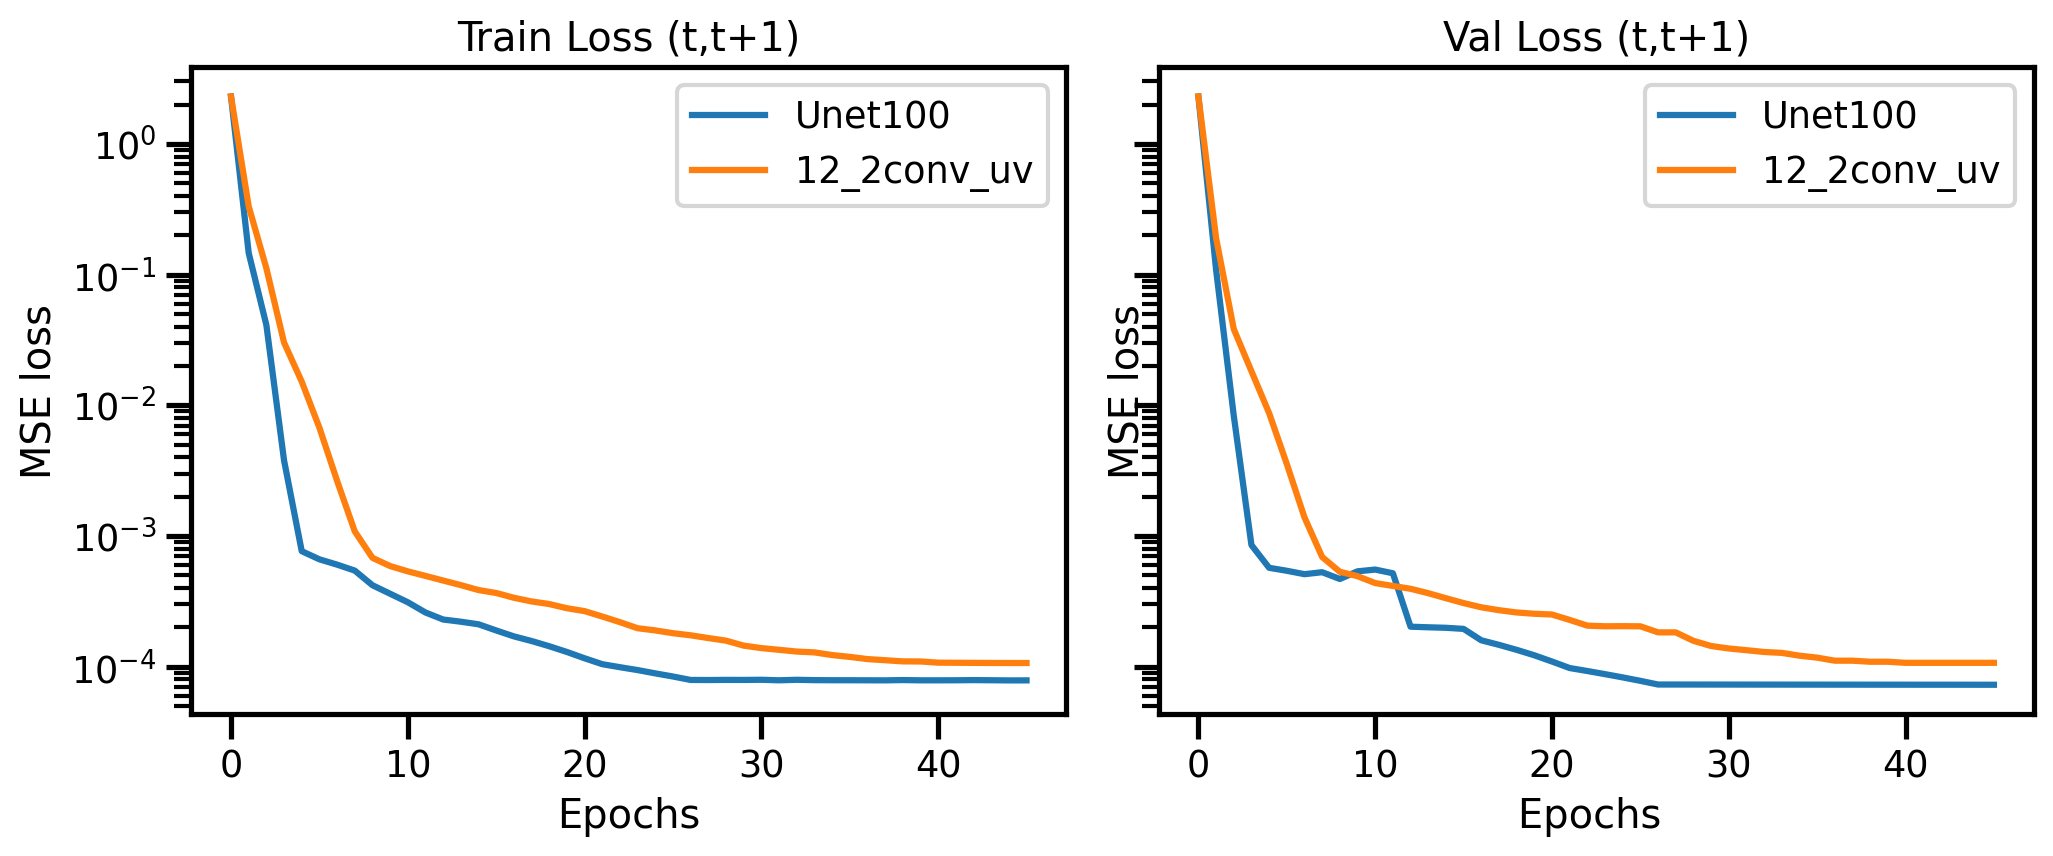

In [98]:
import myfuncts 

sims=myfuncts.load_sims5_3()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
ax1.title.set_text('Train Loss (t,t+1)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')
#ax1.set_xscale('log')
#ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
#ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')

ax2.title.set_text('Val Loss (t,t+1)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()
#ax2.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_xlim([20, 45])
plt.tight_layout()
plt.show()


37.66886 37.820145


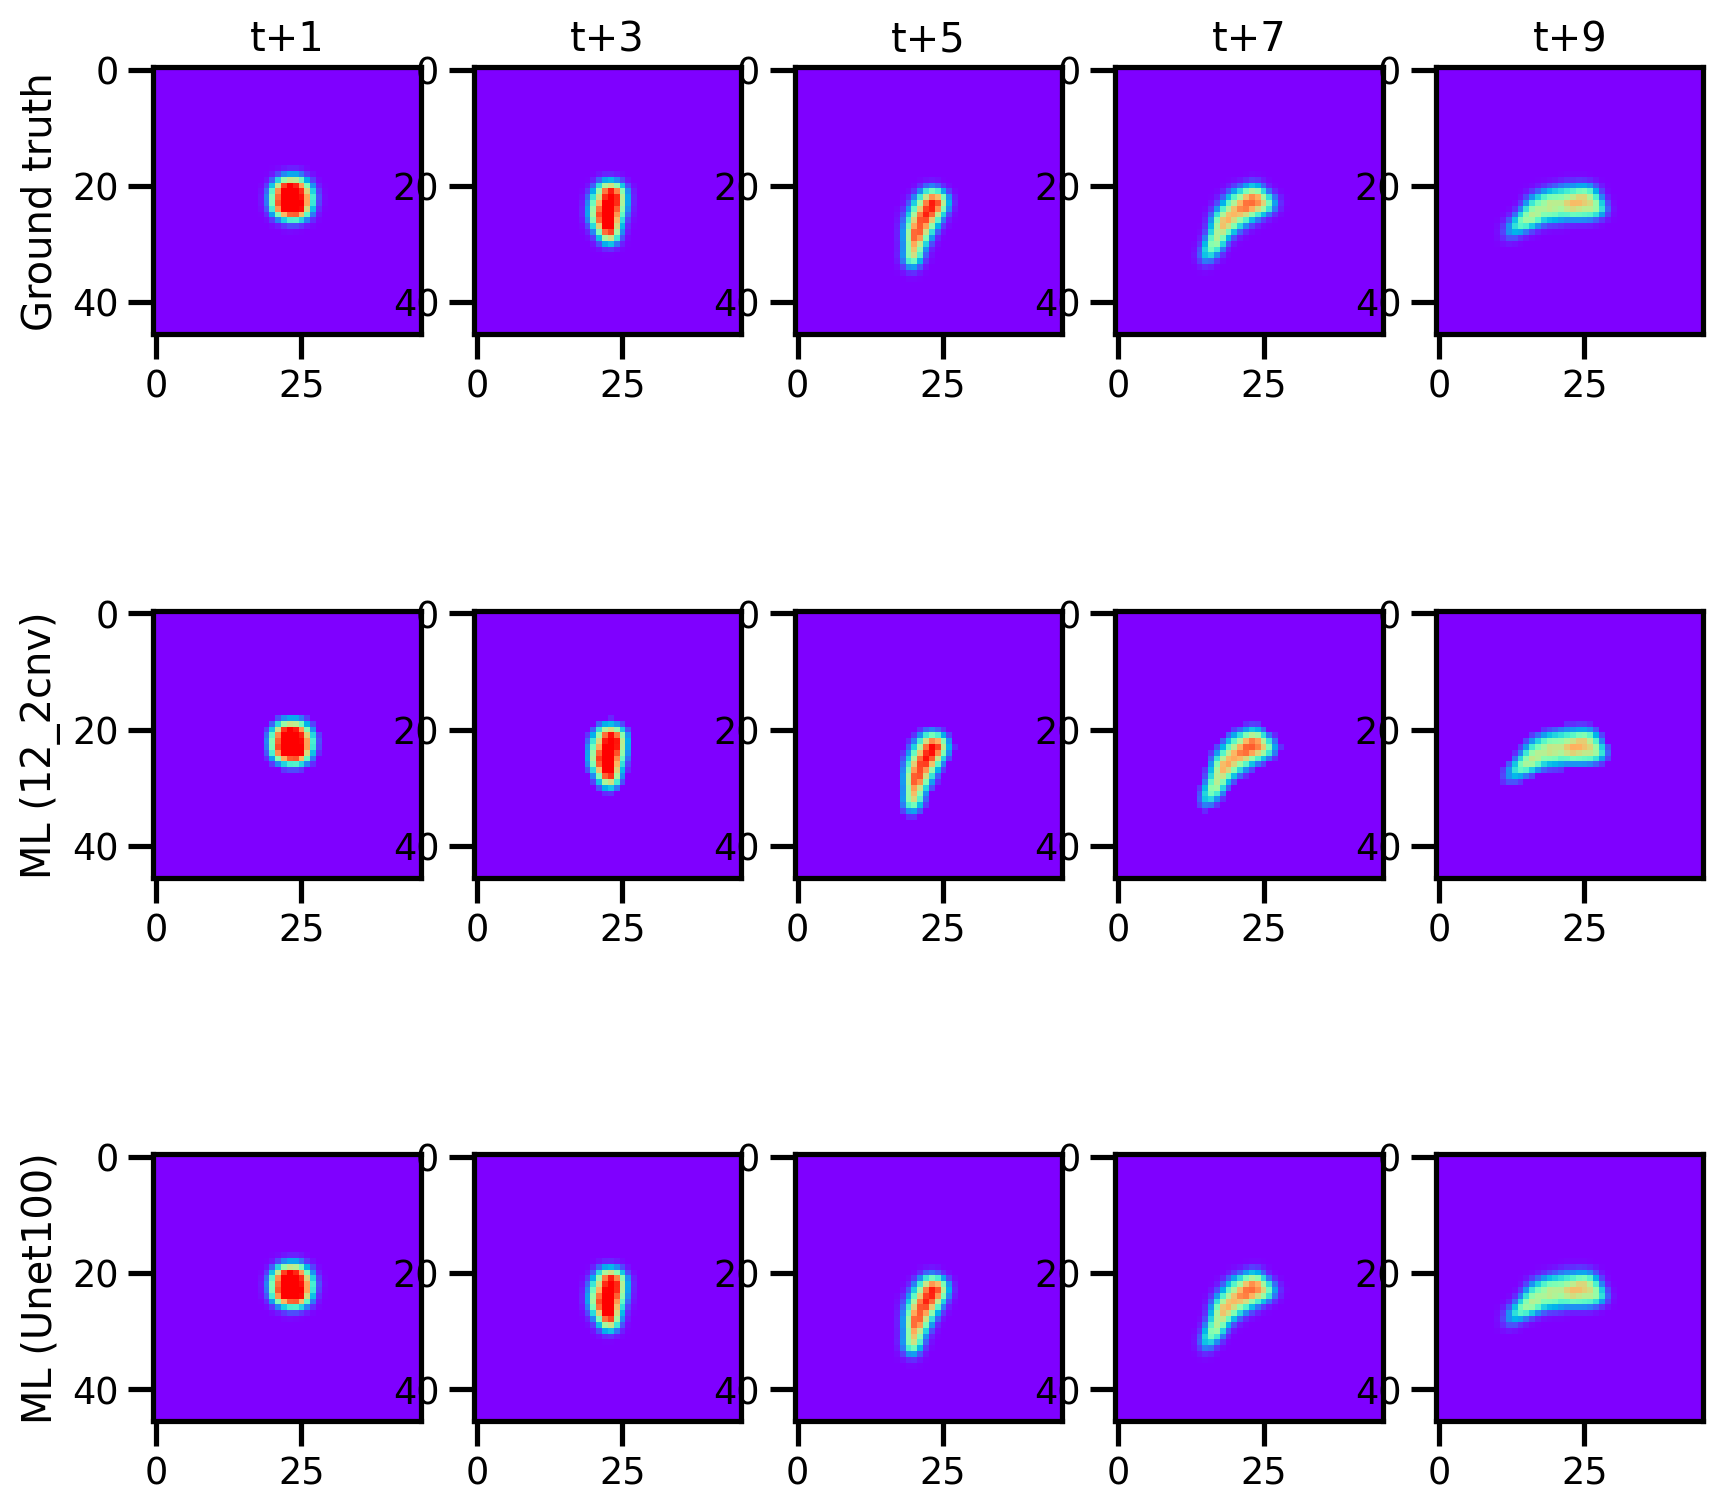

In [122]:
import matplotlib.cm as cm             
import myfuncts 

gt, ml12, Unet100=myfuncts.load_snapsH()

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(10,10))
axs.shape

vm=0.85
k=23
for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    #print(ind)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(Unet100[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (12_2cnv)')
axs[2,0].set_ylabel('ML (Unet100)')
plt.show()


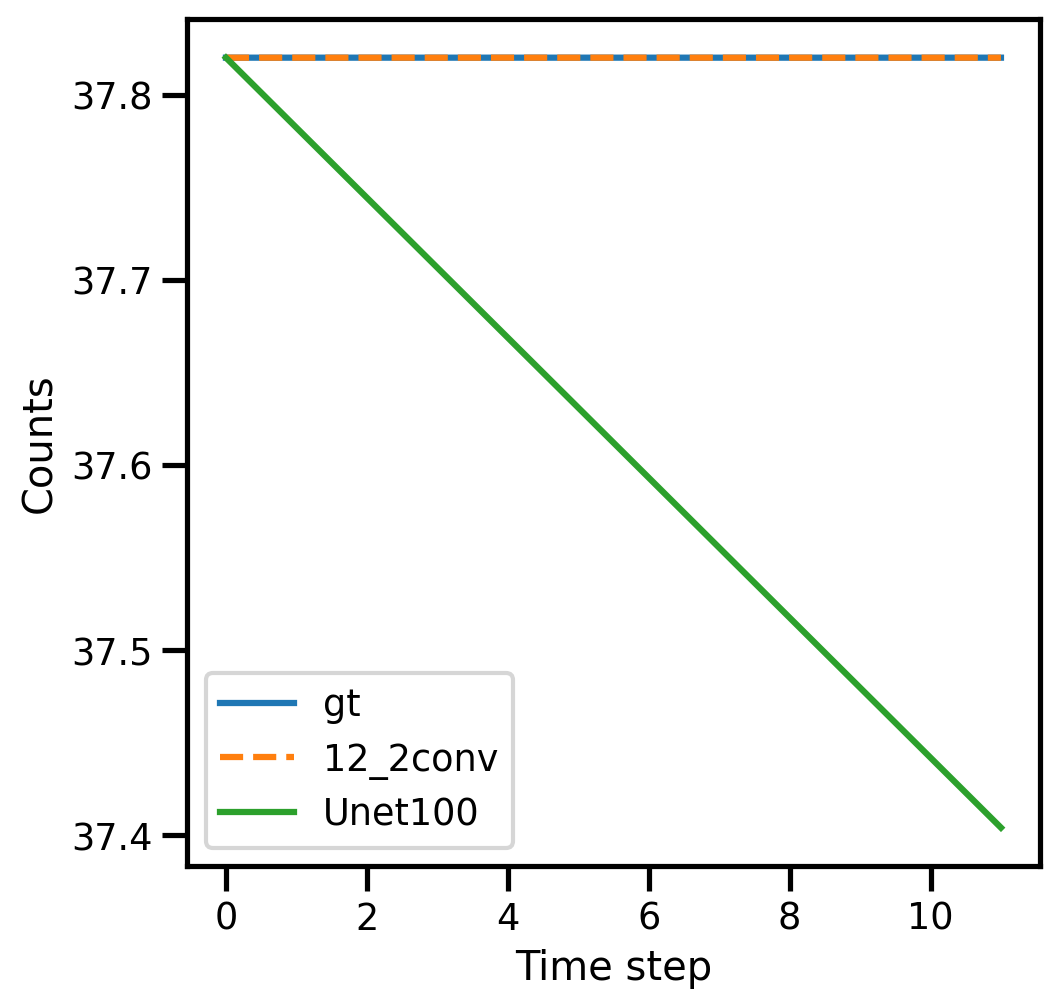

In [126]:
Unet100_=np.zeros(12)
gt_=np.zeros(12)
ml12_=np.zeros(12)
for i in range(12):
    Unet100_[i]=Unet100[i].sum()
    ml12_[i]=ml12[i].sum()
    gt_[i]=gt[i].sum()

plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.plot(gt_, label='gt')
plt.plot(ml12_,'--', label='12_2conv')
plt.plot(Unet100_, label='Unet100')


plt.ylabel('Counts')
plt.xlabel('Time step')
plt.legend()

plt.show()